In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import os
import glob
# path of the data
path = r'C:/Users/pmbw/Development/datasets' 
#Smoothing function
from scipy.ndimage.filters import gaussian_filter1d

In [2]:
#!pip install chart_studio

In [3]:
#import chart_studio.plotly as py


# Import Data

## Velocities average for DNS datasets

In [4]:
#Velocities average for DNS datasets
all_velocities =  glob.glob(path + "/180/600/vel*.dat")
#os.path.join(path, "*.csv")
velocity_lists = []
#iterate through velocities and collate as one file
for velocities in all_velocities:
    velocities_df = pd.read_csv(velocities, index_col=None, header=None,delim_whitespace=True)
    velocity_lists.append(velocities_df)
#concatenate and average for each points ie distance from the wall    
df_avg = pd.concat([each.stack() for each in velocity_lists],axis=1)\
             .apply(lambda x:x.mean(),axis=1)\
             .unstack()
#name the columns as follow
df_avg.columns = ['distance_from_wall', 'x_velocity','y_velocity','z_velocity']
#Normalise data and add additional variables 
df_avg['dist_norm'] = ((0.5-df_avg.distance_from_wall))*2 
#df_avg.to_csv('./datasets/velocities/hendek.csv')

# RMS datasets

In [5]:
all_rms =  glob.glob(path + "/180/600/rms*.dat")
rms_lists = []
#iterate through velocities and collate as one file
for rms in all_rms:
    rms_df = pd.read_csv(rms, index_col=None, header=None,delim_whitespace=True)
    rms_lists.append(rms_df)
#concatenate and average for each points ie distance from the wall    
dfrms_avg = pd.concat([each.stack() for each in rms_lists],axis=1)\
             .apply(lambda x:x.mean(),axis=1)\
             .unstack()
#name the columns as follow
dfrms_avg.columns = ['distance_from_wall', 'x_velocity','y_velocity','z_velocity','shear_stress']
#Normalise data and add additional variables 
dfrms_avg['dist_norm'] = ((0.5-dfrms_avg.distance_from_wall))*2 
#dfrms_avg['uzur'] = dfrms_avg.men**2


In [6]:
df_avg.tail(100)

,distance_from_wall,x_velocity,y_velocity,z_velocity,dist_norm
150,0.313125,-2.130554e-04,-0.001584,1.136995,0.37375
151,0.315000,3.956407e-04,-0.002026,1.132014,0.37000
152,0.316875,-1.091923e-04,-0.001752,1.132175,0.36625
153,0.318750,-1.005276e-05,-0.001664,1.129425,0.36250
154,0.320625,-2.284102e-04,-0.001574,1.128407,0.35875
...,...,...,...,...,...
245,0.491250,-2.792870e-05,-0.000611,0.203248,0.01750
246,0.493125,5.187599e-06,0.000153,0.124655,0.01375
247,0.495000,8.944251e-07,0.000072,0.114809,0.01000
248,0.496875,2.987574e-07,0.000035,0.037510,0.00625


In [7]:
dfrms_avg.head()

,distance_from_wall,x_velocity,y_velocity,z_velocity,shear_stress,dist_norm
0,0.000000,0.044978,0.044617,0.056315,0.000249,1.00000
1,0.003750,0.044866,0.044861,0.056347,0.000108,0.99250
2,0.005625,0.044881,0.044811,0.056378,0.000150,0.98875
3,0.011250,0.044887,0.044901,0.056513,0.000145,0.97750
4,0.013125,0.044903,0.044875,0.056541,0.000166,0.97375


# Previous DNS datasets

In [8]:
df = pd.read_csv(path + '/exp/180_Re_1.dat',
          skiprows=24, header=None, sep='\s\s+', engine='python') 
df.columns = ['OneMin_r', 'OneMin_rPlus1','UzPlus1','UzByUb1', 'Ur_rmsPlus1','Ut_rmsPlus1','Uz_rmsPlus1', 'UzUrPlus1','dUzdrPlus1']
df['OneMin_rPlus'] =df.OneMin_rPlus1/1.8105409983122749E+02
df['UzPlus'] = df.UzPlus1*6.8322301823104711E-02
df['Uz_rmsPlus'] = df.Uz_rmsPlus1*6.8322301823104711E-02

df['Ur_rmsPlus'] = df.Ur_rmsPlus1*6.8322301823104711E-02
df['Ut_rmsPlus'] = df.Ut_rmsPlus1*6.8322301823104711E-02
#Waring invalid value for last row - it's small number when square root taken it invokes runtime error
df['UzUrPlus'] = np.sqrt(df.UzUrPlus1)*6.8322301823104711E-02

C:\Users\pmbw\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Mean axial velocity $U_z^+$

In [9]:
# ax = sns.lineplot(x="yp", y="u", data=df_avg)
# #ax = sns.lineplot(x="OneMin_rPlus", y="UzPlus", data=df)
# ax.set_xscale('log')
#plt.plot(df.OneMin_rPlus,df.UzPlus, color ='blue')

In [10]:
# character description

# '-'       solid line style # '--'      dashed line style # '-.'      dash-dot line style
# ':'       dotted line style # '.'       point marker # ','       pixel marker
# 'o'       circle marker # 'v'       triangle_down marker # '^'       triangle_up marker
# '<'       triangle_left marker # '>'       triangle_right marker # '1'       tri_down marker
# '2'       tri_up marker # '3'       tri_left marker # '4'       tri_right marker
# 's'       square marker # 'p'       pentagon marker # '*'       star marker
# 'h'       hexagon1 marker # 'H'       hexagon2 marker # '+'       plus marker
# 'x'       x marker # 'D'       diamond marker # 'd'       thin_diamond marker
# '|'       vline marker # '_'       hline marker

In [11]:
df.columns

Index(['OneMin_r', 'OneMin_rPlus1', 'UzPlus1', 'UzByUb1', 'Ur_rmsPlus1',
       'Ut_rmsPlus1', 'Uz_rmsPlus1', 'UzUrPlus1', 'dUzdrPlus1', 'OneMin_rPlus',
       'UzPlus', 'Uz_rmsPlus', 'Ur_rmsPlus', 'Ut_rmsPlus', 'UzUrPlus'],
      dtype='object')

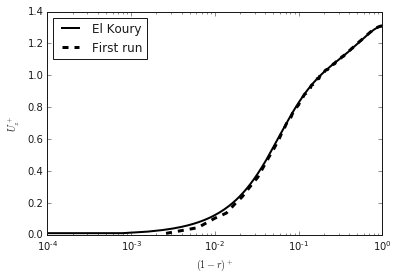

In [12]:
ax = plt.gca()
# Set x logaritmic
ax.set_xscale('log')
#plt.xlim(0.001,1.1)
z_velocity_smoothed = gaussian_filter1d(df_avg.z_velocity, sigma=0.6)
plt.plot(df.OneMin_rPlus,df.UzPlus, color ='black', linewidth=2, markersize=12)
plt.plot(df_avg.dist_norm,z_velocity_smoothed,'--',color ='black', linewidth=3, markersize=12)
plt.ylabel('$U_z^+$')
plt.xlabel('$(1-r)^+$')
plt.legend(['El Koury','First run'], loc='upper left');

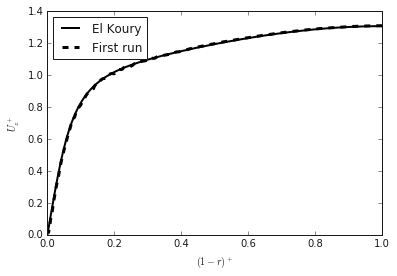

In [13]:
ax = plt.gca()
# Set x logaritmic
#ax.set_xscale('log')
#plt.xlim(0.001,1.1)
z_velocity_smoothed = gaussian_filter1d(df_avg.z_velocity, sigma=0.6)
plt.plot(df.OneMin_rPlus,df.UzPlus, color ='black', linewidth=2, markersize=12)
plt.plot(df_avg.dist_norm,z_velocity_smoothed,'--',color ='black', linewidth=3, markersize=12)
plt.ylabel('$U_z^+$')
plt.xlabel('$(1-r)^+$')
plt.legend(['El Koury','First run'], loc='upper left');

In [14]:
df_avg.head()

,distance_from_wall,x_velocity,y_velocity,z_velocity,dist_norm
0,0.000000,0.000103,-0.000282,1.309738,1.00000
1,0.003750,0.000039,-0.000199,1.309690,0.99250
2,0.005625,0.000057,-0.000282,1.309642,0.98875
3,0.011250,0.000031,-0.000480,1.309307,0.97750
4,0.013125,0.000046,-0.000517,1.309260,0.97375


# RMS


In [15]:
df.columns

Index(['OneMin_r', 'OneMin_rPlus1', 'UzPlus1', 'UzByUb1', 'Ur_rmsPlus1',
       'Ut_rmsPlus1', 'Uz_rmsPlus1', 'UzUrPlus1', 'dUzdrPlus1', 'OneMin_rPlus',
       'UzPlus', 'Uz_rmsPlus', 'Ur_rmsPlus', 'Ut_rmsPlus', 'UzUrPlus'],
      dtype='object')

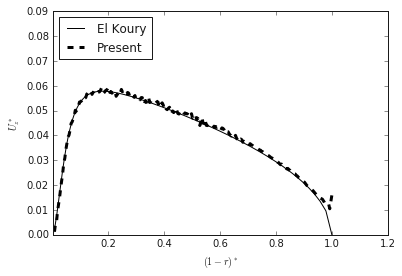

In [16]:
ax = plt.gca()
# Set x logaritmic
#ax.set_xscale('log')
plt.xlim(0.001,1.2)
plt.ylim(0.0,0.09)
shear_stress_rms_smoothed = gaussian_filter1d(np.sqrt(dfrms_avg.shear_stress), sigma=0.5)
plt.plot(df.OneMin_rPlus,df.UzUrPlus, color ='black', linewidth=1)
plt.plot(dfrms_avg.dist_norm,np.sqrt(dfrms_avg.shear_stress),'--',color ='black', linewidth=3)
plt.ylabel('$U_z^*$')
plt.xlabel('$(1-r)^*$')
plt.legend(['El Koury','Present'], loc='upper left');

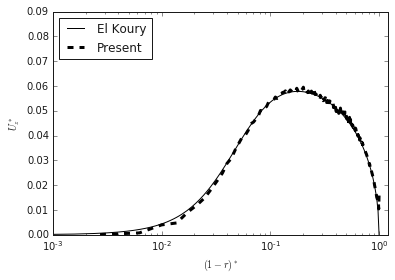

In [17]:
ax = plt.gca()
# Set x logaritmic
ax.set_xscale('log')
plt.xlim(0.001,1.2)
plt.ylim(0.0,0.09)
shear_stress_rms_smoothed = gaussian_filter1d(np.sqrt(dfrms_avg.shear_stress), sigma=0.5)
plt.plot(df.OneMin_rPlus,df.UzUrPlus, color ='black', linewidth=1)
plt.plot(dfrms_avg.dist_norm,np.sqrt(dfrms_avg.shear_stress),'--',color ='black', linewidth=3)
plt.ylabel('$U_z^*$')
plt.xlabel('$(1-r)^*$')
plt.legend(['El Koury','Present'], loc='upper left');

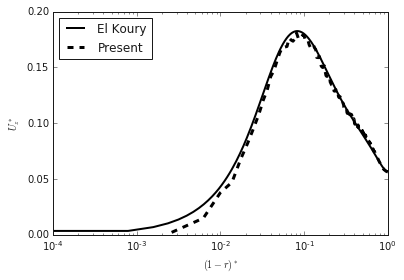

In [18]:
ax = plt.gca()
# Set x logaritmic
ax.set_xscale('log')
#plt.xlim(0.001,1.1)
#plt.ylim(0.0,0.09)
z_rms_smoothed = gaussian_filter1d(dfrms_avg.z_velocity, sigma=0.5)
plt.plot(df.OneMin_rPlus,df.Uz_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,z_rms_smoothed,'--',color ='black', linewidth=3, markersize=12)
plt.ylabel('$U_z^*$')
plt.xlabel('$(1-r)^*$')
plt.legend(['El Koury','Present'],loc='upper left');

In [19]:
dfrms_avg.columns

Index(['distance_from_wall', 'x_velocity', 'y_velocity', 'z_velocity',
       'shear_stress', 'dist_norm'],
      dtype='object')

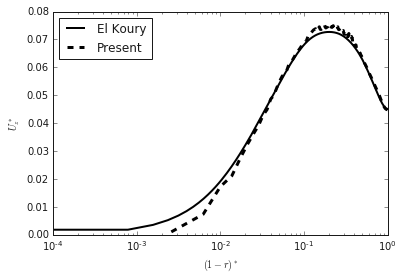

In [20]:
ax = plt.gca()
# Set x logaritmic
ax.set_xscale('log')
#plt.xlim(0.001,1.2)
#plt.ylim(0.0,0.09)
y_rms_smoothed = gaussian_filter1d(dfrms_avg.y_velocity, sigma=0.5)
plt.plot(df.OneMin_rPlus,df.Ut_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,y_rms_smoothed,'--',color ='black', linewidth=3, markersize=12)

plt.ylabel('$U_z^*$')
plt.xlabel('$(1-r)^*$')
plt.legend(['El Koury','Present'], loc='upper left');

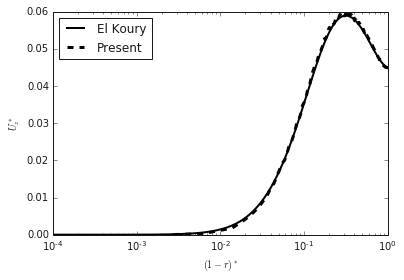

In [21]:
ax = plt.gca()
# Set x logaritmic
ax.set_xscale('log')
#plt.xlim(0.001,1.1)
x_rms_smoothed = gaussian_filter1d(dfrms_avg.x_velocity, sigma=0.5)
plt.plot(df.OneMin_rPlus,df.Ur_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,x_rms_smoothed,'--',color ='black', linewidth=3, markersize=12)
plt.ylabel('$U_z^*$')
plt.xlabel('$(1-r)^*$')
plt.legend(['El Koury','Present'], loc='upper left');

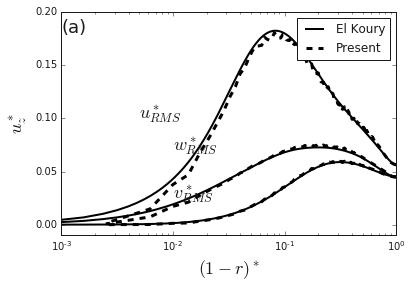

In [22]:
ax = plt.gca()
# Set x logaritmic
ax.set_xscale('log')
plt.xlim(0.001,1)
plt.ylim(-0.01,0.2)
plt.plot(df.OneMin_rPlus,df.Ut_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,y_rms_smoothed,'--',color ='black', linewidth=3, markersize=12)

plt.plot(df.OneMin_rPlus,df.Ur_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,dfrms_avg.x_velocity,'--',color ='black', linewidth=3, markersize=12)

plt.plot(df.OneMin_rPlus,df.Uz_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,z_rms_smoothed,'--',color ='black', linewidth=3, markersize=12)
plt.text(0.005,0.1, '$u_{RMS}^*$',fontsize=18)
plt.text(0.01,0.07,'$w_{RMS}^*$',fontsize=18)
plt.text(0.01,0.025,'$v_{RMS}^*$',fontsize=18)
plt.text(0.001,0.18,'(a)',fontsize=18)
plt.ylabel('$u_z^*$',fontsize=18)
plt.xlabel('$(1-r)^*$',fontsize=18)
plt.legend(['El Koury','Present'], loc='upper right');

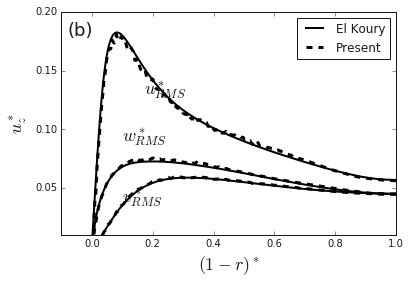

In [23]:
ax = plt.gca()
# Set x logaritmic
#ax.set_xscale('log')
plt.xlim(-0.1,1)
plt.ylim(0.01,0.2)
plt.plot(df.OneMin_rPlus,df.Ut_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,y_rms_smoothed,'--',color ='black', linewidth=3, markersize=12)
plt.plot(df.OneMin_rPlus,df.Ur_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,dfrms_avg.x_velocity,'--',color ='black', linewidth=3, markersize=12)
plt.plot(df.OneMin_rPlus,df.Uz_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,z_rms_smoothed,'--',color ='black', linewidth=3, markersize=12)
plt.text(0.17,0.13, '$u_{RMS}^*$',fontsize=18)
plt.text(0.1,0.09,'$w_{RMS}^*$',fontsize=18)
plt.text(0.1,0.038,'$v_{RMS}^*$',fontsize=18)
plt.text(-0.08,0.18,'(b)',fontsize=18)
plt.ylabel('$u_z^*$',fontsize=18)
plt.xlabel('$(1-r)^*$',fontsize=18)

plt.legend(['El Koury','Present'], loc='upper right');

# Injecting  particles

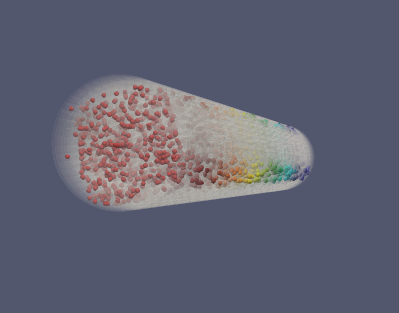

In [26]:
from IPython.display import Image

Image('C:/Users/pmbw/Development/code/b.png')

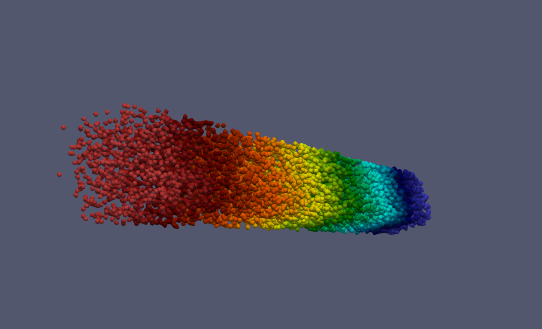

In [27]:
Image('C:/Users/pmbw/Development/code/bb.png')

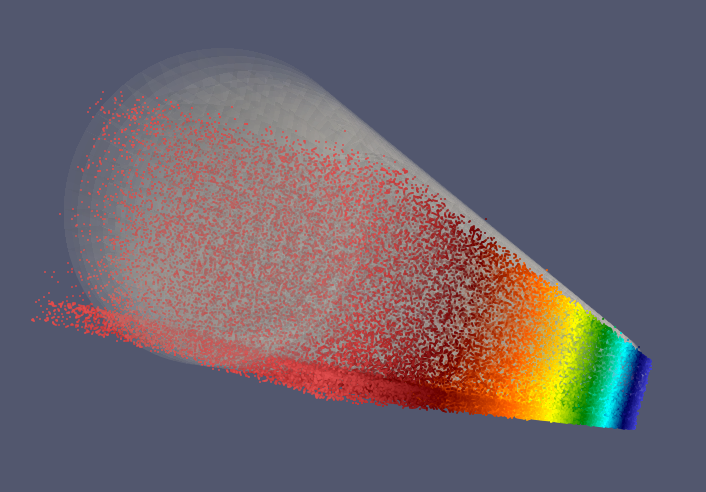

In [28]:
Image('C:/Users/pmbw/Development/code/bbb.png')

In [30]:
pwd

'C:\\Users\\pmbw\\Development\\code'